In [1]:
# https://www.geeksforgeeks.org/image-compression-using-k-means-clustering/ 

import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump
from numpy import linalg as LA

In [2]:
image = Image.open("data/football.bmp")
image

pixels_og = np.asarray(image)
pixels = np.reshape(pixels_og,(-1,3))


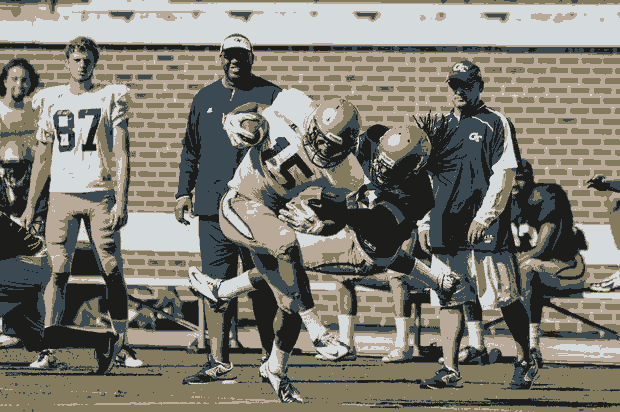

In [7]:
# SciPy Version
comp = KMeans(n_clusters=5,n_init=10)
comp.fit(pixels)
centroid = np.array([list(comp.cluster_centers_[label]) 
                           for label in comp.labels_])

centroid = np.array([list(comp.cluster_centers_[label]) 
                           for label in comp.labels_])



centroid = centroid.astype("uint8")
# reshape this array according to the height and width of our image
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im


In [8]:
"""
stop = 1
cluster = np.zeros((1,len(pixels)))
cluster_prev = cluster
it = 0

k = 5

centr = np.zeros((k,3))

for i in range(k):
    rand = np.random.choice(len(pixels),size=10, replace=False)
    centr[i] = np.mean(pixels[rand],axis=0)
    

while stop == 1:
    for id1 in range(len(pixels)):
        dist = np.zeros((1,k))
 
        for ic in range(k):
            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])
            dist = np.append(dist, dist_)
        cluster_ = np.argmin(dist)
        cluster = np.append(cluster, cluster_)
    
    for ic in range(k):
        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))
        
    if np.abs(cluster_prev - cluster) < 1e-4:
        stop = 0
        
    cluster_prev = cluster
    
    it += 1
"""



'\nstop = 1\ncluster = np.zeros((1,len(pixels)))\ncluster_prev = cluster\nit = 0\n\nk = 5\n\ncentr = np.zeros((k,3))\n\nfor i in range(k):\n    rand = np.random.choice(len(pixels),size=10, replace=False)\n    centr[i] = np.mean(pixels[rand],axis=0)\n    \n\nwhile stop == 1:\n    for id1 in range(len(pixels)):\n        dist = np.zeros((1,k))\n \n        for ic in range(k):\n            dist_ = LA.norm((pixels[id1,:])-centr[ic,:])\n            dist = np.append(dist, dist_)\n        cluster_ = np.argmin(dist)\n        cluster = np.append(cluster, cluster_)\n    \n    for ic in range(k):\n        center = np.append(np.mean(pixels[:,clusters==ic],axis=0))\n        \n    if np.abs(cluster_prev - cluster) < 1e-4:\n        stop = 0\n        \n    cluster_prev = cluster\n    \n    it += 1\n'

Iterations: 32


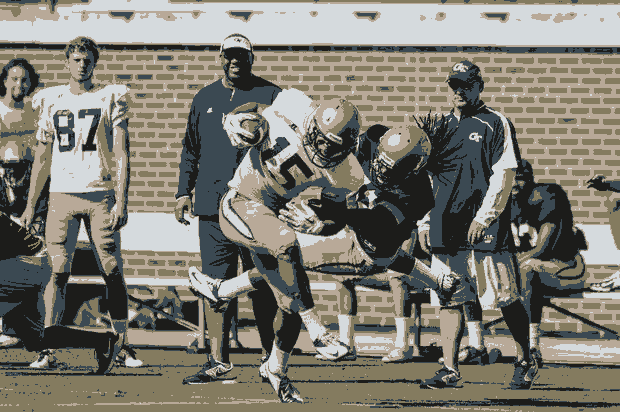

In [6]:
# My Version

def k_means(X, k, max_iters=100):
    num_samples, num_features = X.shape

    # Initialize centroids randomly from data points
    centroids = X[np.random.choice(num_samples, k, replace=False)]
    iterations = 0
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        iterations += 1
        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels, iterations

# Example usage
np.random.seed(42)
num_samples = 100
num_features = 2
k = 5

# Generate random data
X = np.random.randn(num_samples, num_features)

# Run k-means algorithm
centroids, labels, iterations = k_means(pixels, k)
#print("Final centroids:", centroids)
#print("Cluster labels:", labels)
print("Iterations:", iterations)
centroid = np.array([list(centroids[label]) 
                           for label in labels])

centroid = centroid.astype("uint8")
centroids_reshaped = np.reshape(centroid, (image.height, image.width, 3), "C")


compressed_im = Image.fromarray(centroids_reshaped)

# display compressed image
compressed_im

